<a href="https://colab.research.google.com/github/iBoxerman/tf-intro/blob/colab/TF_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [1]:
import numpy as np

In [2]:
!pwd
!cd /
!ls -l

/content
total 4
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data


In [3]:
print("Hello world!")

Hello world!


# Celsius To Fhrenheit

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)
for i,c in enumerate(celsius_q):
  print(f'{c}^c, {fahrenheit_a[i]}^f')

-40.0^c, -40.0^f
-10.0^c, 14.0^f
0.0^c, 32.0^f
8.0^c, 46.0^f
15.0^c, 59.0^f
22.0^c, 72.0^f
38.0^c, 100.0^f


Assembling layers

In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

Compiling

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Training

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


displaying the trainging statistics

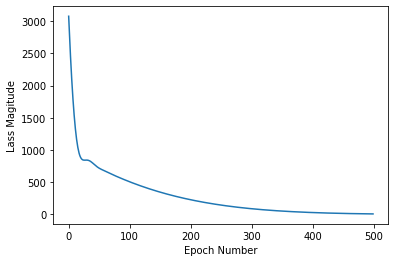

In [9]:
plt.xlabel('Epoch Number')
plt.ylabel('Lass Magitude')
plt.plot(history.history['loss'])

Prediction

In [10]:
print(model.predict([100.0]))

[[211.32152]]


Looking at the layer weights

In [11]:
print(f'These are the layer vars {l0.get_weights()}')

These are the layer vars [array([[1.8228306]], dtype=float32), array([29.038467], dtype=float32)]


# Fashion MNIST

In [12]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.2 MB 31.5 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [13]:
# tf imports
import tensorflow as tf
import tensorflow_datasets as tf_ds
# other imports
import math
import numpy as np
import matplotlib.pyplot as plt
# for progress bars display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm 

import Fashion MNIST

In [ ]:
dataset, metadata = tf_ds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [ ]:
class_names = ['T-short/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Exploring the data

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset, test_dataset = train_dataset.map(normalize),test_dataset.map(normalize)

Ploting 25 exmaples

In [ ]:
plt.figure(figsize=(10,10))
i=0
for (img,lbl) in test_dataset.take(25):
  img = img.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_names[lbl])
  i+=1
plt.show()

Building the model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Compiling

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training

In [ ]:
BATCH_SIZE= 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [ ]:
epoch_step = math.ceil(num_train_examples/BATCH_SIZE)
model.fit(train_dataset, epochs=5, steps_per_epoch=epoch_step)

Testing

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print(f'acc on test datatset: {test_acc}')

Predicting

# CNN

In [ ]:
# tf imports
import tensorflow as tf
import tensorflow_datasets as tf_ds
# other imports
import math
import numpy as np
import matplotlib.pyplot as plt
# for progress bars display
import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm 

In [ ]:
dataset, metadata = tf_ds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
class_names = ['T-short/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset, test_dataset = train_dataset.map(normalize),test_dataset.map(normalize)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE= 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

epoch_step = math.ceil(num_train_examples/BATCH_SIZE)
model.fit(train_dataset, epochs=10, steps_per_epoch=epoch_step)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print(f'acc on test datatset: {test_acc}')

# Advanced CNN - DOGS & CATS

Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

Getting the data

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

Extractiing paths to images

In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

In [ ]:
base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

Printing and validating that our data is what we want

In [ ]:
print(f'Training:\ncats:{num_cats_tr}, dogs:{num_dogs_tr}, total: {total_train}'
      f'\n-----\n'
      f'Validation:\ncats:{num_cats_val}, dogs:{num_dogs_val}, total: {total_val}\n')

Setting model parameters

In [ ]:
BATCH_SIZE=100
IMAGE_SHAPE=150

Data preperation

In [ ]:
train_img_generator = ImageDataGenerator(rescale=1./255)
validation_img_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                         class_mode='binary')
validatino_data_gen = validation_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                                   directory=validation_dir,
                                                                   shuffle=False,
                                                                   target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                                   class_mode='binary')

Visualizing training set

In [ ]:
sample_training_imgs,_ = next(train_data_gen)

def plotImgs(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes= axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImgs(sample_training_imgs[:5])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = validatino_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))),
)

In [ ]:
for k in history.history:
  print(k)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Acuuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training & Validation Loss')

In [ ]:
# last layer    tf.keras.layers.Dense(2, activation='softmax')
# can be        tf.keras.layers.Dense(1, activation='sigmoid')
# but then model.compile(loss='binary_crossentropy')
# instead 'sparse_categorical_crossentropy'

# Advanced CNN - DOGS & CATS - IMPROVED

Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

Getting the data

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

Extractiing paths to images

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

Printing and validating that our data is what we want

In [6]:
print(f'Training:\ncats:{num_cats_tr}, dogs:{num_dogs_tr}, total: {total_train}'
      f'\n-----\n'
      f'Validation:\ncats:{num_cats_val}, dogs:{num_dogs_val}, total: {total_val}\n')

Training:
cats:1000, dogs:1000, total: 2000
-----
Validation:
cats:500, dogs:500, total: 1000



Setting model parameters

In [7]:
BATCH_SIZE=100
IMAGE_SHAPE=150

Data Augmentation

In [8]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes= axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [9]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip=True,
                                     fill_mode = 'nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                               class_mode = 'binary')

Found 2000 images belonging to 2 classes.


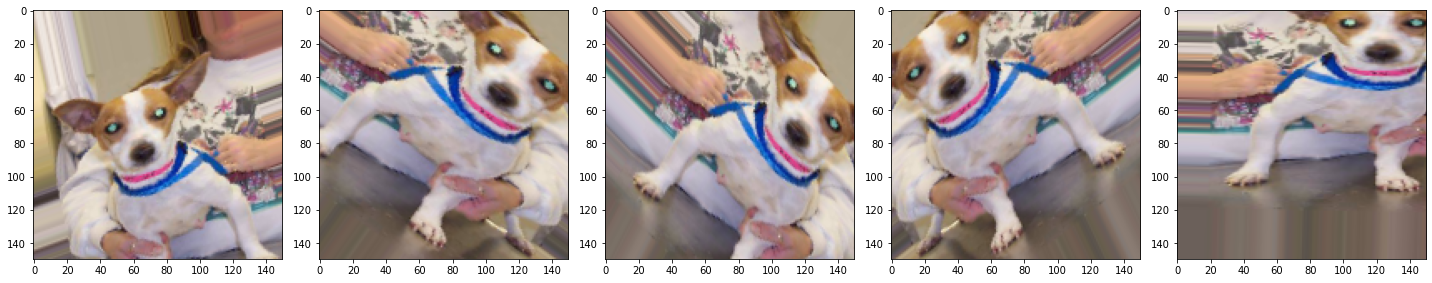

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
validation_img_generator = ImageDataGenerator(rescale=1./255)
validatino_data_gen = validation_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                                   directory=validation_dir,
                                                                   shuffle=False,
                                                                   target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(2, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
EPOCHS = 60
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = validatino_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/60
20/20 [==============================] - 21s 833ms/step - loss: 0.7400 - accuracy: 0.5125 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 2/60
20/20 [==============================] - 17s 848ms/step - loss: 0.6935 - accuracy: 0.5095 - val_loss: 0.6925 - val_accuracy: 0.5470
Epoch 3/60
20/20 [==============================] - 17s 842ms/step - loss: 0.6931 - accuracy: 0.5090 - val_loss: 0.6917 - val_accuracy: 0.6240
Epoch 4/60
20/20 [==============================] - 17s 863ms/step - loss: 0.6912 - accuracy: 0.5285 - val_loss: 0.6864 - val_accuracy: 0.6020
Epoch 5/60
20/20 [==============================] - 18s 880ms/step - loss: 0.6888 - accuracy: 0.5275 - val_loss: 0.6849 - val_accuracy: 0.6290
Epoch 6/60
20/20 [==============================] - 18s 869ms/step - loss: 0.6855 - accuracy: 0.5405 - val_loss: 0.6716 - val_accuracy: 0.5150
Epoch 7/60
20/20 [==============================] - 17s 842ms/step - loss: 0.6751 - accuracy: 0.5700 - val_loss: 0.6504 - val_accuracy: 0.6140

In [17]:
for k in history.history:
  print(k)

loss
accuracy
val_loss
val_accuracy


Text(0.5, 1.0, 'Training & Validation Loss')

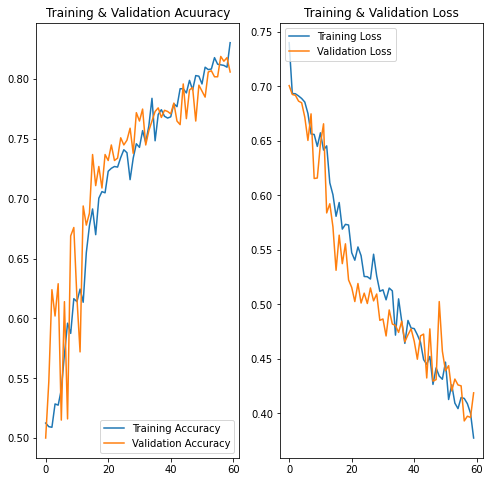

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Acuuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training & Validation Loss')

In [ ]:
# last layer    tf.keras.layers.Dense(2, activation='softmax')
# can be        tf.keras.layers.Dense(1, activation='sigmoid')
# but then model.compile(loss='binary_crossentropy')
# instead 'sparse_categorical_crossentropy'

# Transfer Learning

In [20]:
!pip install 'tf-nightly-gpu==1.14.1-dev20190409'
!pip install 'tensorflow_hub==0.4.0'

ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu==1.14.1-dev20190409 (from versions: 2.8.0.dev20210925, 2.8.0.dev20210926, 2.8.0.dev20210927, 2.8.0.dev20210928, 2.8.0.dev20210929, 2.8.0.dev20210930, 2.8.0.dev20211001, 2.8.0.dev20211002, 2.8.0.dev20211003, 2.8.0.dev20211004, 2.8.0.dev20211005, 2.8.0.dev20211006, 2.8.0.dev20211007, 2.8.0.dev20211008, 2.8.0.dev20211009, 2.8.0.dev20211010, 2.8.0.dev20211011, 2.8.0.dev20211012, 2.8.0.dev20211014, 2.8.0.dev20211015, 2.8.0.dev20211016, 2.8.0.dev20211017, 2.8.0.dev20211018, 2.8.0.dev20211019, 2.8.0.dev20211020, 2.8.0.dev20211021, 2.8.0.dev20211022, 2.8.0.dev20211023, 2.8.0.dev20211024, 2.8.0.dev20211025, 2.8.0.dev20211026, 2.8.0.dev20211027, 2.8.0.dev20211028, 2.8.0.dev20211029, 2.8.0.dev20211030, 2.8.0.dev20211031, 2.8.0.dev20211101, 2.8.0.dev20211102, 2.8.0.dev20211103, 2.8.0.dev20211104, 2.8.0.dev20211105, 2.8.0.dev20211106, 2.8.0.dev20211107, 2.8.0.dev20211108, 2.8.0.dev20211109, 2.8.0.dev20211110, 2.8.0.dev202

# Save & Load models

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tensorflow.keras import layers

In [3]:
train_examples, validation_examples = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True, split=['train[:75%]', 'train[75%:]'])


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
